In [1]:
using BoundaryValueDiffEq, ForwardDiff, DifferentialEquations, OrdinaryDiffEq, Plots

In [2]:
#! ############################# 1D ###############################
# potential from the second version of the Adrian & Peter paper
potential(x) = x^4/4 - x^2/2;

# the characteristic function coming from the constant amplitude distribution, i.e. rho(a) = delta(a-1)/2 + delta(a+1)/2
phi_const(x) = cosh(x) - 1

phi_const (generic function with 1 method)

In [3]:
xx = -1.5:0.01:0.1;

In [4]:
# initial and final conditions (from paper)
xi = -1.0
xf = 0.0;

In [5]:
# parameter values (from paper)
a = 10.0
lam = 0.01

# timespan (from paper)
tspan = (0.0, 10.0)


# EL equations with PSN
function euler_lagrange_p!(du, u, p, t) 
    du[1] = -ForwardDiff.derivative(potential, u[1]) + u[2] + a * lam * ForwardDiff.derivative(phi_const, a*u[2])
    du[2] = ForwardDiff.derivative(x -> ForwardDiff.derivative(potential, x), u[1])*u[2]
end

#EL equations without PSN
function euler_lagrange_np!(du, u, p, t)
    du[1] = -ForwardDiff.derivative(potential, u[1]) + u[2]
    du[2] = ForwardDiff.derivative(x -> ForwardDiff.derivative(potential, x), u[1])*u[2]
end


function bc2!(residual, u, p, t) # u[1] is the beginning of the time span, and u[end] is the ending
    residual[1] = u[1][1] - xi 
    residual[2] = u[end][1] - xf
end

bc2! (generic function with 1 method)

In [6]:
###Array of initial conditions for "g"
xgnps = collect(0.06:0.01:0.14);


# initial guess array
u0nps = [[xi, k] for k in xgnps]

bvp_nps = [BVProblem(euler_lagrange_np!, bc2!, k, tspan) for k in u0nps];

sol_nps = [solve(k, Shooting(Vern7())) for k in bvp_nps];                       



┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=1.247135961805075. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/diegotapias/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=1.4582286299241474. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/diegotapias/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=2.542767735098557. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/diegotapias/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=1.1943353381263186. Aborting. There is either an error i

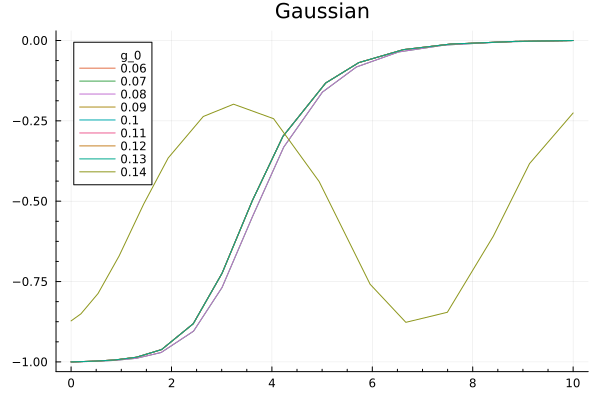

In [7]:
i = 1
plot([1.0], [-1.0], label = "g_0", color = :white)
plot!(sol_nps[i].t, map(x-> x[1], sol_nps[i].u), label=xgnps[i],  xticks = 0:2:10)
for i in 2:length(xgnps)
    plot!(sol_nps[i].t, map(x-> x[1], sol_nps[i].u), label=xgnps[i])
end
plot!(title = "Gaussian", minorticks = 4)


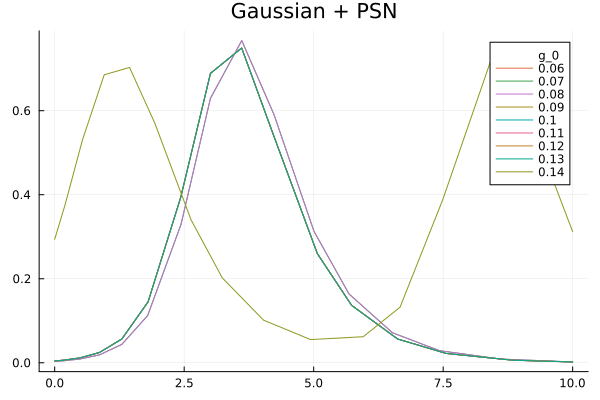

In [8]:
###Solution g(t)

plot([1.0], [0.1], label = "g_0", color = :white)
i = 1
plot!(sol_nps[i].t, map(x-> x[2], sol_nps[i].u), label=xgnps[i])
for i in 2:length(xgnps)
    plot!(sol_nps[i].t, map(x-> x[2], sol_nps[i].u), label=xgnps[i])
end
plot!(title = "Gaussian + PSN")


In [9]:
###Initial conditions found by the shooting method for the different g_0's
i = 1
println(map(x-> x[2], sol_nps[i].u)[1])
for i in 2:length(xgnps)
    println(map(x-> x[2], sol_nps[i].u)[1])
end


0.0043991111948440366
0.00336774284147891
0.003374537207497545
0.004399110558581133
0.004399111175390694
0.004399111047413981
0.004399111055254139
0.004399110966262751
0.2939256697216252


In [10]:

xgps = collect(0.01:0.01:0.06);


# initial guess array
u0ps = [[xi, k] for k in xgps]

bvp_ps = [BVProblem(euler_lagrange_p!, bc2!, k, tspan) for k in u0ps];

sol_ps = [solve(k, Shooting(Vern7())) for k in bvp_ps];                       
#plot(sol_np.t, map(x-> x[1], sol_np.u), label="PSN", marker = :circle, xticks = 0:2:10)



┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=0.8294450368659259. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/diegotapias/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: Instability detected. Aborting
└ @ SciMLBase /Users/diegotapias/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:536
┌ Warning: Instability detected. Aborting
└ @ SciMLBase /Users/diegotapias/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:536
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=1.4337642463333884. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/diegotapias/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=1.4084911514094018. Aborting. There is either an error in your mod

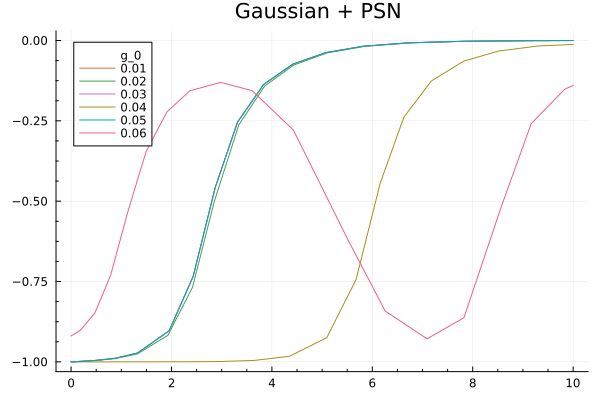

In [11]:
i = 1
plot([1.0], [-1.0], label = "g_0", color = :white)
plot!(sol_ps[i].t, map(x-> x[1], sol_ps[i].u), label=xgps[i],  xticks = 0:2:10)
for i in 2:length(xgps)
    plot!(sol_ps[i].t, map(x-> x[1], sol_ps[i].u), label=xgps[i])
end

plot!(title = "Gaussian + PSN ", minorticks = 4)



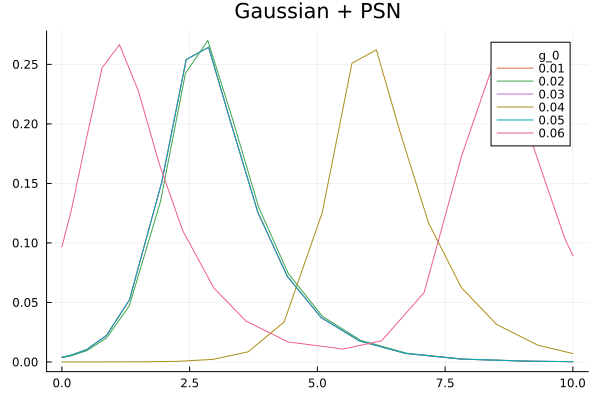

In [12]:
###Solution g(t)

plot([1.0], [0.1], label = "g_0", color = :white)
i = 1
plot!(sol_ps[i].t, map(x-> x[2], sol_ps[i].u), label=xgps[i])
for i in 2:length(xgps)
    plot!(sol_ps[i].t, map(x-> x[2], sol_ps[i].u), label=xgps[i])
end
plot!(title = "Gaussian + PSN")


In [13]:
###Initial conditions found by the shooting method for the different g_0's
i = 1
println(map(x-> x[2], sol_ps[i].u)[1])
for i in 2:length(xgps)
    println(map(x-> x[2], sol_ps[i].u)[1])
end
#plot!(title = "PSN")


0.003981530378409043
0.0035919616442014746
0.0039815304171104075
5.893241535909653e-6
0.003981530383904258
0.09671336542861805


In [14]:
###Smoother curves with comand saveat. I will use the optimal "intial" values found previously

xgnp = 0.004399110558581133


# initial guess array
u0np = [xi, xgnp] 

bvp_np = BVProblem(euler_lagrange_np!, bc2!, u0np, tspan) ;

sol_np = solve(bvp_np, Shooting(Vern9()), saveat = 0.2) ;

In [15]:

xgp = 0.003981530378409043

# initial guess array
u0p = [xi, xgp] 

bvp_p = BVProblem(euler_lagrange_p!, bc2!, u0p, tspan)
sol_p = solve(bvp_p, Shooting(Vern7()), saveat = 0.2);

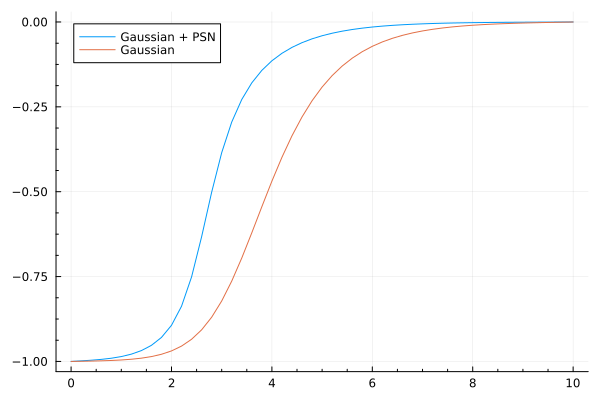

In [16]:
plot(sol_p.t, map(x-> x[1], sol_p.u), label="Gaussian + PSN", xticks = 0:2:10, minorticks = 4)
plot!(sol_np.t, map(x-> x[1], sol_np.u), label="Gaussian")


In [17]:
savefig("instantons.pdf")

"/Users/diegotapias/Downloads/instantons.pdf"